[View in Colaboratory](https://colab.research.google.com/github/AhmedMaghawry/Food-Image-Recognition/blob/master/Food_Detection.ipynb)

# Food Image Recognition


---


***With 3 Algorithms***




# **Dataset Load**



##1.   Connect to Drive



In [0]:
!pip install -U -q PyDrive
import os
from os import chdir, listdir, stat
from sys import exit
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ast
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pydrive.files import GoogleDriveFileList
import googleapiclient.errors

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

## **2. Read Images in the zip files**

In [2]:
!pip install -U protobuf
import zipfile
import scipy.misc
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image
from skimage import color
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os
import keras

file_data = {}
lable = {}
X_train = []
Y_train = []
X_test = []
Y_test = []
file_list_two = drive.ListFile(
     {'q': "'1C541q0mNpLYBkOgK9WeOTTwKQh_rhX3B' in parents and trashed=false"}).GetList()
for ff in file_list_two:
            print('title: %s, id: %s' % (ff['title'], ff['id']))
            fname = os.path.join(local_download_path, ff['title'])
            print (fname)
            f_ = drive.CreateFile({'id': ff['id']})
            f_.GetContentFile(fname)
            with zipfile.ZipFile(fname) as archive:
              for entry in archive.infolist():
                with archive.open(entry) as file:
                  if (file.name.endswith('g')):
                    img = Image.open(file)
                    if (ff['title'].split('.')[0] == 'training'):
                      X_train.append(np.asarray( img, dtype="float64" ))
                      #X_train.append(cv2.cvtColor(np.array(img), cv2.COLOR_GRAY2BGR).astype("float32")/255)
                      #X_train.append(color.rgb2gray((np.asarray( img, dtype="float64" ))))
                      Y_train.append(file.name.split('_')[0])
                    elif (ff['title'].split('.')[0] == 'validation'):
                      X_test.append(np.asarray( img, dtype="float64" ))
                      #X_test.append(cv2.cvtColor(np.array(img), cv2.COLOR_GRAY2BGR).astype("float32")/255)
                      #X_test.append(color.rgb2gray((np.asarray( img, dtype="float64" ))))
                      Y_test.append(file.name.split('_')[0])
                    #print(img.size, img.mode, len(img.getdata()))

Requirement already up-to-date: protobuf in /usr/local/lib/python3.6/dist-packages (3.6.1)


Using TensorFlow backend.


title: training.zip, id: 1e8xh2J-vkoXWSSxLDKK3Xs2qC60ksgC_
/root/data/training.zip
title: validation.zip, id: 1tccvZowCrgVCshFlEV-oU7Tm7xhIa7G0
/root/data/validation.zip
title: evaluation.zip, id: 1iUsB7vERANdWrcL-UL_w20epP9G2RpYs
/root/data/evaluation.zip


##3. Customize the images to be trainable

In [0]:
X_train_res = np.array(X_train[0:2000], dtype="float") / 255.0
X_test_res = np.array(X_test[0:1000], dtype="float") / 255.0
Y_train_res = np.array(Y_train[0:2000])
Y_test_res = np.array(Y_test[0:1000])
#Y_train_res_cat = keras.utils.to_categorical(Y_train_res, 11)
#Y_test_res_cat = keras.utils.to_categorical(Y_test_res, 11)
mlb = MultiLabelBinarizer()
Y_train_bin = mlb.fit_transform(Y_train_res)
Y_test_bin = mlb.fit_transform(Y_test_res)

# **Visualize The Data**
with The help from Anime Cartoon Team

##Show a test Image

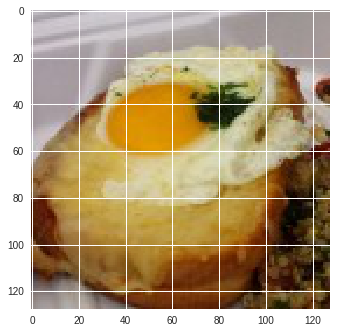

In [5]:
plt.imshow(X_train_res[3020])
plt.show()

##Show Detailed Image

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


(38, 38, 3)


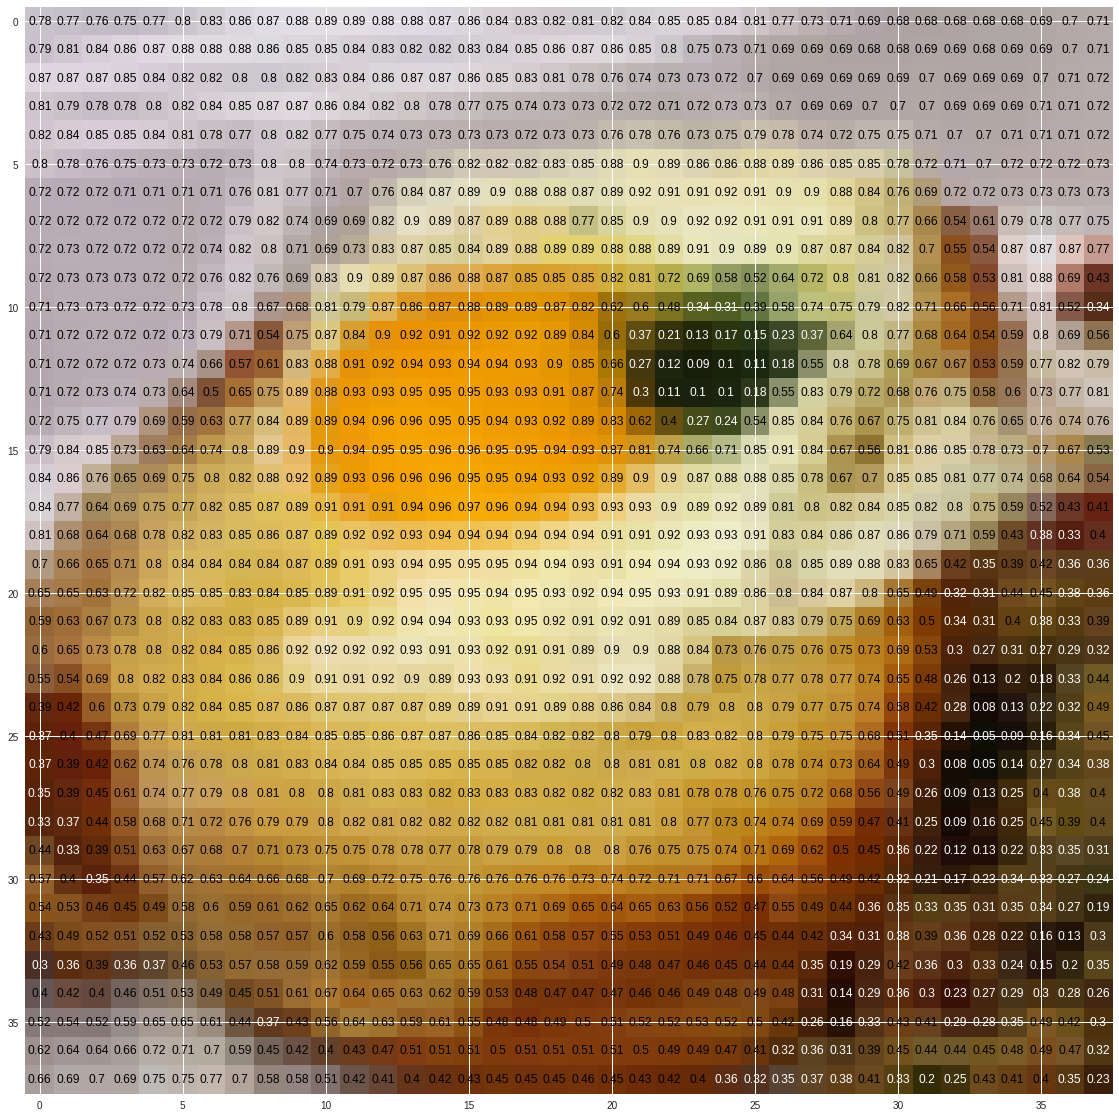

In [6]:
def visalize_image(img, ax):
  ax.imshow(img)
  print(img.shape)
  width, hight, ff = img.shape
  thresh = img.max() / 2.5
  for x in range(width):
    for y in range(hight):
      ax.annotate(str(round(img[x][y][0], 2)), xy=(y, x),
                 horizontalalignment='center',
                 verticalalignment= 'center',
                 color='white' if img[x][y][0] < thresh else 'black'
                 )
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
test_image = scipy.misc.imresize(X_train_res[3020], 0.3)
test_image = test_image.astype("float64") / 255

visalize_image(test_image,ax)

# **Training Phase**

##1. NN

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

model = Sequential()
model.add(Flatten(input_shape=X_train_res.shape[1:]))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(11, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])			 

model.fit(X_train_res, Y_train_res_cat,
          epochs=50,
          batch_size=16,
          validation_data=(X_test_res, Y_test_res_cat))

Train on 9866 samples, validate on 3430 samples
Epoch 1/50
9866/9866 [==============================] - 28s 3ms/step - loss: 2.2639 - acc: 0.1790 - val_loss: 2.2524 - val_acc: 0.2064
Epoch 2/50
9866/9866 [==============================] - 27s 3ms/step - loss: 2.1807 - acc: 0.2106 - val_loss: 2.1858 - val_acc: 0.2055
Epoch 3/50
9866/9866 [==============================] - 27s 3ms/step - loss: 2.1258 - acc: 0.2243 - val_loss: 2.1417 - val_acc: 0.2251
Epoch 4/50
9866/9866 [==============================] - 27s 3ms/step - loss: 2.0787 - acc: 0.2451 - val_loss: 2.1794 - val_acc: 0.2367
Epoch 5/50
9866/9866 [==============================] - 27s 3ms/step - loss: 2.0442 - acc: 0.2643 - val_loss: 2.0917 - val_acc: 0.2583
Epoch 6/50
9866/9866 [==============================] - 28s 3ms/step - loss: 2.0074 - acc: 0.2673 - val_loss: 2.0797 - val_acc: 0.2732
Epoch 7/50
9866/9866 [==============================] - 27s 3ms/step - loss: 1.9775 - acc: 0.2842 - val_loss: 2.1206 - val_acc: 0.2601
Epoch 8

In [10]:
score = model.evaluate(X_test_res, Y_test_res_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.659930882300997
Test accuracy: 0.2880466472303207


##2.CNN

###CNN Model

In [4]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

model = Sequential()
inputShape = (128, 128, 3)
model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
# (CONV => RELU) * 2 => POOL
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# (CONV => RELU) * 2 => POOL
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# use a *softmax* activation for single-label classification
# and *sigmoid* activation for multi-label classification
model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 42, 42, 64)        0         
__________

 #### without data Expantion

In [5]:
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

EPOCHS = 75
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (128, 128, 3)

#opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss="binary_crossentropy", optimizer="SGD",
	metrics=["accuracy"])

res = model.fit(X_train_res, Y_train_bin,
          batch_size=BS,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test_res, Y_test_bin))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87, in catch_config_error
   

Train on 9866 samples, validate on 3430 samples
Epoch 1/75
9866/9866 [==============================] - 33s 3ms/step - loss: 0.4603 - acc: 0.8632 - val_loss: 0.4033 - val_acc: 0.8672
Epoch 2/75
9866/9866 [==============================] - 30s 3ms/step - loss: 0.4090 - acc: 0.8710 - val_loss: 0.3196 - val_acc: 0.8930
Epoch 3/75
9866/9866 [==============================] - 30s 3ms/step - loss: 0.3808 - acc: 0.8762 - val_loss: 0.3724 - val_acc: 0.8813
Epoch 4/75
9866/9866 [==============================] - 30s 3ms/step - loss: 0.3535 - acc: 0.8827 - val_loss: 0.4804 - val_acc: 0.8623
Epoch 5/75
9866/9866 [==============================] - 30s 3ms/step - loss: 0.3398 - acc: 0.8849 - val_loss: 0.3231 - val_acc: 0.8919
Epoch 6/75
9866/9866 [==============================] - 30s 3ms/step - loss: 0.3203 - acc: 0.8892 - val_loss: 0.3012 - val_acc: 0.8946
Epoch 7/75
9866/9866 [==============================] - 30s 3ms/step - loss: 0.3101 - acc: 0.8910 - val_loss: 0.3331 - val_acc: 0.8887
Epoch 8

NameError: ignored

In [6]:
score = model.evaluate(X_test_res, Y_test_bin, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2843568009294504
Test accuracy: 0.9013702564614855


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


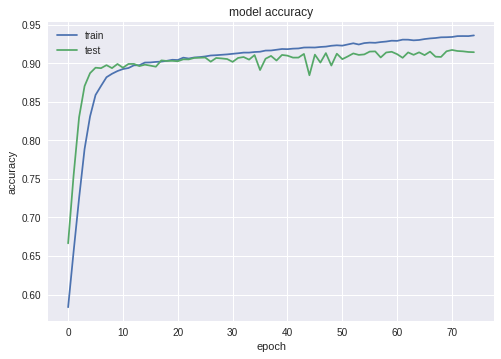

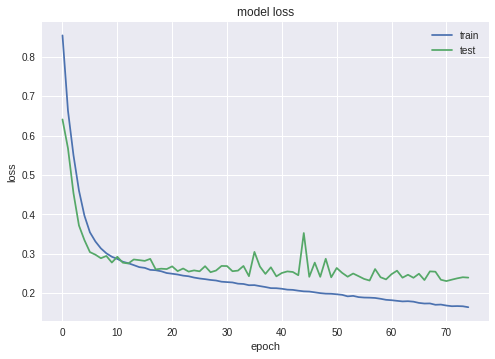

In [23]:
#plot acc and loss vs epochs
import matplotlib.pyplot as plt
print(res.history.keys())
#accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig(os.path.join(savePath,'cmdeP80AccVsEpoch.jpeg'), dpi=1000, bbox_inches='tight')
plt.show()
#loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig(os.path.join(savePath,'cmdeP80LossVsEpoch.jpeg'), dpi=1000, bbox_inches='tight')
plt.show()

#### with data Expantion

In [0]:
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

EPOCHS = 75
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (128, 128, 3)

train_datagen = ImageDataGenerator(
                                   #featurewise_center=True,
                                   #featurewise_std_normalization=True,
                                   rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True, fill_mode="nearest")

#trainDir = 'Data\Train'
train_generator = train_datagen.flow(X_train_res, Y_train_bin,batch_size=32)
test_datagen = ImageDataGenerator(rescale=1./255)  
#testDir = 'Data\Test'
test_generator = test_datagen.flow(X_test_res, Y_test_bin,batch_size=32, shuffle=True)

# aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
# 	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
# 	horizontal_flip=True, fill_mode="nearest")
#opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

#Fit the model
# model.compile(loss="binary_crossentropy", optimizer="SGD",
# 	metrics=["accuracy"])
res = model.fit_generator(train_generator,
                    nb_epoch=EPOCHS,
                    verbose=1,
                    validation_data=test_generator)

#evaluate the model
scores = model.evaluate_generator(test_generator)
print("Accuracy = ", scores[1])


# model.fit_generator(
# 	aug.flow(X_train_res, Y_train_bin, batch_size=BS),
# 	validation_data=(X_test_res, Y_test_bin),
# 	epochs=EPOCHS, verbose=1)

#aug.flow(X_train, Y_train, batch_size=BS),
#steps_per_epoch=len(X_train) // BS,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87, in catch_config_error
   

In [0]:
#plot acc and loss vs epochs
import matplotlib.pyplot as plt
print(res.history.keys())
#accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig(os.path.join(savePath,'cmdeP80AccVsEpoch.jpeg'), dpi=1000, bbox_inches='tight')
plt.show()
#loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig(os.path.join(savePath,'cmdeP80LossVsEpoch.jpeg'), dpi=1000, bbox_inches='tight')
plt.show()

# plt.style.use("ggplot")
# plt.figure()
# N = EPOCHS
# plt.plot(np.arange(0, N), res.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), res.history["val_loss"], label="val_loss")
# plt.plot(np.arange(0, N), res.history["acc"], label="train_acc")
# plt.plot(np.arange(0, N), res.history["val_acc"], label="val_acc")
# plt.title("Training Loss and Accuracy")
# plt.xlabel("Epoch #")
# plt.ylabel("Loss/Accuracy")
# plt.legend(loc="upper left")
# #plt.savefig(args["plot"])
# score = model.evaluate(X_test, Y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])


##3.Decision Tree

###Customize the Data

In [0]:
import numpy as np 

from sklearn.tree import DecisionTreeClassifier

X_train_dec = np.asarray(X_train_res)
Y_train_dec =np.asarray(Y_train_res)

res_X_train = []
i=0
for n in X_train_dec:
#   if (i == 5000) :
#     break
  b = np.reshape(n, (np.product(n.shape)))
  b=np.asarray(b)
  res_X_train.append(b)
  i = i + 1

X_test_dec = np.asarray(X_test_res)
Y_test_dec = np.asarray(Y_test_res)

res_X_test = []
for n in X_test_dec:
  b = np.reshape(n, (np.product(n.shape)))
  b=np.asarray(b)
  res_X_test.append(b)

###Train and Fit the Data

In [10]:
foodTree = DecisionTreeClassifier(criterion="gini")
foodTree.fit(res_X_train, Y_train_dec)

predTree = foodTree.predict(res_X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: "), metrics.accuracy_score(Y_test_dec, predTree)

DecisionTrees's Accuracy: 


(None, 0.5175879396984925)

##4.DNN

####Model creation

In [6]:
import numpy as np
import keras as K
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers.normalization import BatchNormalization

np.random.seed(1)
inputShape = (128, 128, 3)
model = K.models.Sequential()
model.add(K.layers.Dense(units=200, input_shape=inputShape,
  activation='relu'))
model.add(Flatten())
model.add(K.layers.Dense(units=100,
  activation='relu'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(K.layers.Dense(units=3,
  activation='sigmoid'))
model.compile(loss='binary_crossentropy',
  optimizer='SGD', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128, 128, 200)     800       
_________________________________________________________________
flatten_2 (Flatten)          (None, 3276800)           0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               327680100 
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 303       
Total para

####Train

In [7]:
print("Starting training ")
num_epochs = 10
h = model.fit(X_train_res, Y_train_bin, batch_size=50,
  epochs=num_epochs, verbose=1) 
print("Training finished \n")

print("Training history: ")
for i in range(num_epochs):
  if i % 1 == 0:
    los = h.history['loss'][i]
    acc = h.history['acc'][i] * 100
    print("epoch: %5d loss = %0.4f acc = %0.2f%%" \
      % (i, los, acc))

Starting training 
Epoch 1/10
2000/2000 [==============================] - 60s 30ms/step - loss: 0.7669 - acc: 0.5680
Epoch 2/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.6938 - acc: 0.6052
Epoch 3/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.6733 - acc: 0.6280
Epoch 4/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.6469 - acc: 0.6453
Epoch 5/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.6161 - acc: 0.6745
Epoch 6/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.6008 - acc: 0.6827
Epoch 7/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.5915 - acc: 0.6903
Epoch 8/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.5858 - acc: 0.6947
Epoch 9/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.5731 - acc: 0.7132
Epoch 10/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.5616 - ac

####Fit

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(np.reshape(X_train_res,(2000, 128*128*3)), Y_train_bin)

# predict the response
pred = knn.predict(np.reshape(X_test_res,(1000, 128*128*3)))

# evaluate accuracy
print (accuracy_score(Y_test_bin, pred))

0.36


dict_keys(['loss', 'acc'])


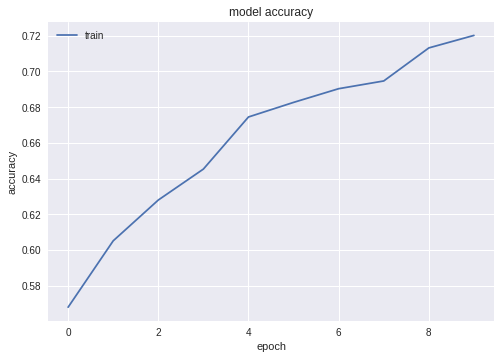

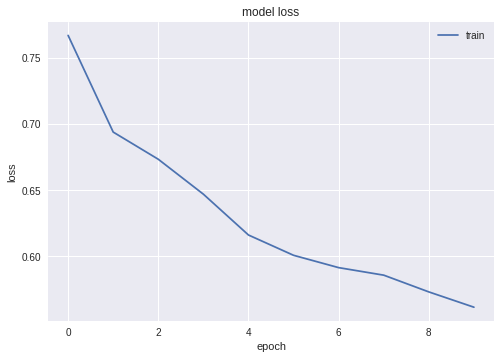

In [10]:
#plot acc and loss vs epochs
import matplotlib.pyplot as plt
print(h.history.keys())
#accuracy
plt.plot(h.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig(os.path.join(savePath,'cmdeP80AccVsEpoch.jpeg'), dpi=1000, bbox_inches='tight')
plt.show()
#loss
plt.plot(h.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig(os.path.join(savePath,'cmdeP80LossVsEpoch.jpeg'), dpi=1000, bbox_inches='tight')
plt.show()